# Objetivo

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes. Ao fim vamos comparar o modelo random forest com o modelo de regressão logística.

# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.


**WebPurchases: Se comprou online (1) ou não comprou online(2) .**

# ETAPA 1:

**Preparação dos Dados**

**Exploração, Limpeza e Análise:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem. Além de verificar padrões entre as variáveis.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
base = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [3]:
base

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,46,709,43,182,42,118,247,4,5,0,1
2236,1946,PhD,Together,64014.0,2,56,406,0,30,0,0,8,5,7,0,1
2237,1981,Graduation,Divorced,56981.0,0,91,908,48,217,32,12,24,13,6,0,0
2238,1956,Master,Together,69245.0,0,8,428,30,214,80,30,61,10,3,0,1


In [4]:
base.describe()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,5.790179,5.316518,0.009375,0.503571
std,11.984069,25173.076661,0.538398,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,3.250958,2.426645,0.096391,0.500099
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,5.000000,6.000000,0.000000,1.000000
75%,1977.000000,68522.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,666666.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,13.000000,20.000000,1.000000,1.000000


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

Analisando as estatísticas acima vemos que há uma pessoa de nascimento em 1893, o que é improvável, mas não impossível. Além disso, temos um salário que pode ser discrepante dos outros, mas analisaremos isso mais a fundo. Em seguida vamos tratar os dados nulos.

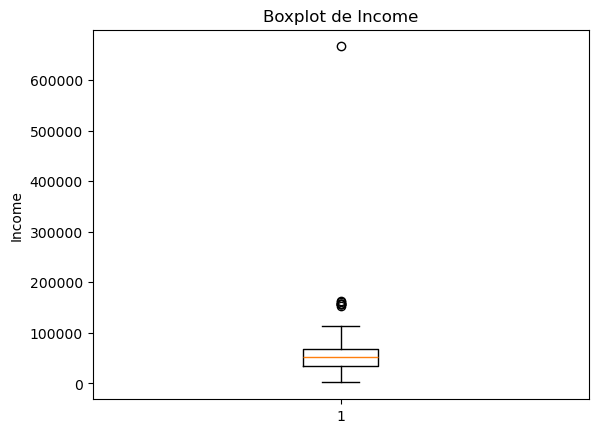

In [6]:
plt.figure()
plt.boxplot(base['Income'].dropna())
plt.title('Boxplot de Income')
plt.ylabel('Income')
plt.show()

Pelo boxplot temos um salário extremamente discrepante dos outros, assim vamos excluí-lo do banco de dados por possível interferência no modelo que treinaremos posteriormente.

In [7]:
base = base[base['Income'] != 666666.0]

In [8]:
base['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
base['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Ao checar as respostas sobre status civil, temos duas respostas 'Absurd' e 'YOLO' que são possíveis piadas. Além disso temos que Alone e Single pertencem a mesma classe. Abaixo vamos colocar 'Alone' junto com Single e tirar as pessoas que colocaram 'Absurd' e 'YOLO'.

In [10]:
base['Marital_Status'] = base['Marital_Status'].replace('Alone', 'Single')

C:\Users\marce\AppData\Local\Temp\ipykernel_29628\3406067325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Marital_Status'] = base['Marital_Status'].replace('Alone', 'Single')


In [11]:
base = base[~base['Marital_Status'].isin(['YOLO', 'Absurd'])]

Ao vermos as respostas de nível educacional, não precisamos fazer tratamento. 

In [12]:
base['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Agora vamos analisar a coluna de salário (Income) pois ela possui dados nulos. 

In [13]:
base['Income'].isna().mean()

np.float64(0.010738255033557046)

In [14]:
base.groupby(base['Income'].isna())['WebPurchases'].mean()

Income
False    0.504297
True     0.416667
Name: WebPurchases, dtype: float64

Temos que 1% das pessoas do dataset não preencheu o campo "Income" (salário), como é uma quantidade irrisória dentro dos dados e além disso possui uma distruição equilibrada dentro da nossa variável target, assim vamos substituir os campos faltantes pela mediana.

In [15]:
median_income = base['Income'].median()
base['Income'] = base['Income'].fillna(median_income)

Agora vamos analisar graficamente algumas interações entre as variáveis com a nossa variável target.

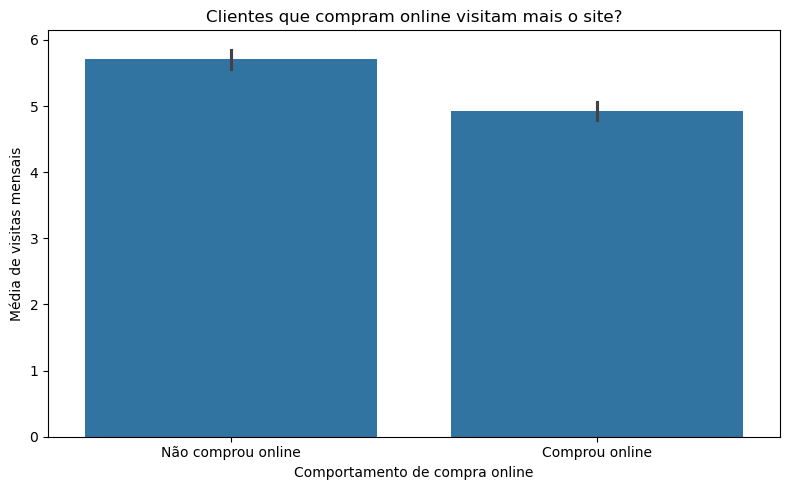

In [16]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=base,
    x='WebPurchases',
    y='NumWebVisitsMonth',
    errorbar='ci'
)

plt.xticks([0,1], ['Não comprou online', 'Comprou online'])
plt.xlabel('Comportamento de compra online')
plt.ylabel('Média de visitas mensais')
plt.title('Clientes que compram online visitam mais o site?')

plt.tight_layout()
plt.show()

Observamos que pessoas que não compraram online apresentam, em média, mais visitas ao site do que aquelas que efetivamente compraram. Isso pode indicar alguns cenários possíveis:

1- Intenção sem conversão – o cliente demonstra interesse, mas pode estar aguardando promoção, desconto ou melhor condição de pagamento.

2 - Pesquisa online, compra offline – utiliza o site para verificar estoque, especificações ou preço, mas finaliza a compra na loja física.

3 - Comparação de preços – acessa o site apenas como referência e acaba comprando em concorrentes.

4 - Indecisão ou fricção no funil – pode haver barreiras na experiência (frete, prazo, UX) que impedem a conversão.

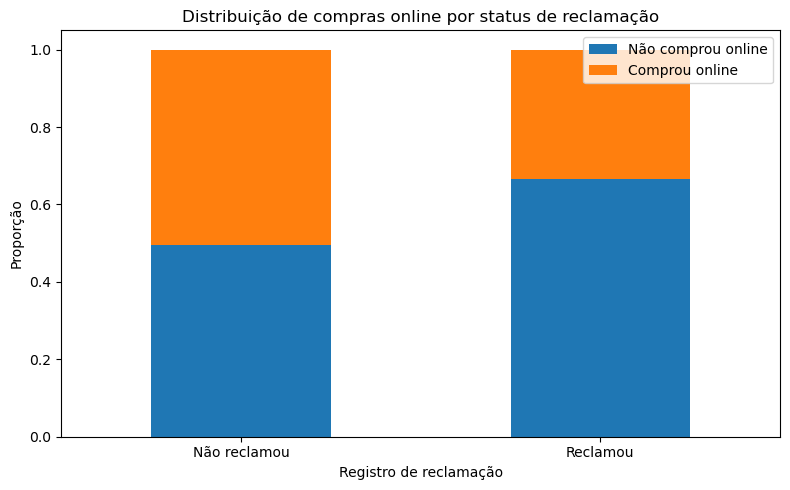

In [17]:
prop = (
    base
    .groupby('Complain')['WebPurchases']
    .value_counts(normalize=True)
    .unstack()
)

prop.plot(kind='bar', stacked=True, figsize=(8,5))

plt.xticks([0,1], ['Não reclamou', 'Reclamou'], rotation=0)
plt.xlabel('Registro de reclamação')
plt.ylabel('Proporção')
plt.title('Distribuição de compras online por status de reclamação')

plt.legend(['Não comprou online', 'Comprou online'])
plt.tight_layout()
plt.show()

Temos dois comportamentos bem distintos:

Clientes que não reclamaram
-Mais de 60% realizaram compras online. Isso sugere uma associação positiva entre experiência sem fricção e conversão digital.

Clientes que reclamaram
-Mais de 60% não compraram online. Isso pode indicar:

-Migração para loja física após uma experiência negativa no site;

-Perda de confiança no canal digital;

-Ou até abandono da marca.

Entre os que reclamaram e ainda assim compraram online (pouco acima de 30%), pode haver maior tolerância ou dependência do canal digital.

No entanto, essa análise é apenas associativa. Para aprofundar, seria importante investigar:

-Tipo de reclamação (logística, produto, atendimento, pagamento etc.);

-Canal onde ocorreu o problema (online ou loja física);

-Se houve resolução e tempo de resposta;

-Categoria de produto envolvida.

Sem esse contexto, não podemos afirmar causalidade, apenas identificar um padrão comportamental relevante.

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=base,
    y='Education',
    x='WebPurchases',
    estimator='mean',
    order=base.groupby('Education')['WebPurchases'].mean().sort_values().index,
    errorbar='ci'
)

plt.xlabel('Proporção de compras online')
plt.ylabel('Nível de escolaridade')
plt.title('Taxa de compra online por nível de escolaridade')

plt.xlim(0, 1)

plt.tight_layout()
plt.show()


Ao analisar a taxa de compra por nível de escolaridade, observamos uma tendência geral de aumento na proporção de compras online conforme o nível educacional cresce.

As categorias Master e Graduation apresentam taxas bastante próximas, indicando comportamento semelhante entre esses grupos.

Já o grupo com escolaridade básica apresenta uma taxa significativamente menor de compras online. Isso pode indicar diferenças de perfil socioeconômico, poder de compra ou familiaridade com o canal digital.

In [ ]:
sns.set_style("whitegrid")

# Limites
min_income = 1730
max_income = 162397

# Criando 5 faixas iguais
bins = np.linspace(min_income, max_income, 6)

# Criando labels formatadas
labels = [
    f'{int(bins[i]):,} – {int(bins[i+1]):,}'
    for i in range(len(bins)-1)
]

# Aplicando os bins com labels
income_bins = pd.cut(
    base['Income'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Total gasto dinâmico
total_spent = (
    base['MntWines'] +
    base['MntFruits'] +
    base['MntMeatProducts'] +
    base['MntFishProducts'] +
    base['MntSweetProducts'] +
    base['MntGoldProds']
)

# DataFrame auxiliar
temp_df = pd.DataFrame({
    'Faixa de Renda': income_bins,
    'Total Gasto': total_spent
})

mean_spent = temp_df.groupby('Faixa de Renda')['Total Gasto'].mean().reset_index()

# Plot
plt.figure(figsize=(9,5))

sns.barplot(
    data=mean_spent,
    x='Faixa de Renda',
    y='Total Gasto'
)

plt.title('Média de Gasto Total por Faixa de Renda')
plt.xlabel('Faixa de Renda Anual (R$)')
plt.ylabel('Média de Gasto Total (últimos 2 anos)')
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Ao analisar a média de gasto total por faixa de renda, observa-se um crescimento consistente no consumo conforme a renda aumenta, até a faixa intermediária-alta.

Os clientes com renda entre aproximadamente 65 k e 130k apresentam as maiores médias de gasto, indicando que esse grupo concentra o maior ticket médio dentro da base analisada.

Já o grupo com renda entre 1,7 k e  33 k apresenta um nível de gasto significativamente inferior, o que pode estar relacionado a restrições orçamentárias ou a um perfil de consumo mais conservador.

Interessante notar que, na faixa mais alta de renda (acima de R$ 130 mil), há uma leve redução na média de gasto em comparação às faixas imediatamente anteriores. Isso pode indicar:

- Menor sensibilidade a promoções da loja;

- Diversificação de consumo em outros estabelecimentos;

- Menor representatividade estatística desse grupo na amostra.

In [ ]:
store_binary = (base['NumStorePurchases'] > 0).astype(int)

temp_df = pd.DataFrame({
    'Compra em Loja Física': store_binary,
    'Comprou Online': base['WebPurchases']
})

temp_df['Compra em Loja Física'] = temp_df['Compra em Loja Física'].map({
    0: 'Não comprou na loja física',
    1: 'Comprou na loja física'
})

# Calculando proporção
result = temp_df.groupby('Compra em Loja Física')['Comprou Online'].mean().reset_index()

fig = px.bar(
    result,
    x='Compra em Loja Física',
    y='Comprou Online',
    text='Comprou Online',
    labels={
        'Compra em Loja Física': '',
        'Comprou Online': 'Proporção que comprou online'
    },
    title='Probabilidade de Compra Online condicionada à Compra em Loja Física'
)

fig.update_traces(texttemplate='%{text:.1%}', textposition='outside')
fig.update_layout(yaxis_range=[0,1])
fig.update_layout(yaxis_tickformat='.0%')

fig.show()

Abaixo temos um gráfico que ilustra a proporção de compras online condicionada à realização de compras em loja física:

- Entre os clientes que efetuaram ao menos uma compra em loja física, 50,5% também realizaram compras online.

- Entre aqueles que não compraram em loja física, apenas 20,0% compraram online.

Essa diferença expressiva sugere uma associação positiva entre os dois canais: indivíduos que frequentam a loja física tendem a apresentar maior propensão à compra online. Uma possível interpretação é que o contato prévio com os produtos no ambiente físico pode aumentar a confiança e o interesse, facilitando a conversão posterior no canal digital.

In [ ]:
sns.set_style("whitegrid")

temp_df = pd.DataFrame({
    'Compra Online': base['WebPurchases'],
    'Número de Compras em Loja Física': base['NumStorePurchases']
})

temp_df['Compra Online'] = temp_df['Compra Online'].map({
    0: 'Não comprou online',
    1: 'Comprou online'
})

plt.figure(figsize=(7,5))

sns.barplot(
    data=temp_df,
    x='Compra Online',
    y='Número de Compras em Loja Física',
    estimator='mean',
    errorbar='ci'
)

plt.title('Média de Compras em Loja Física\ncondicionada à Compra Online')
plt.xlabel('')
plt.ylabel('Média de compras em loja física')

plt.tight_layout()
plt.show()

Observa-se que clientes que realizaram compras online apresentam, em média, um número significativamente maior de compras em loja física quando comparados aos que não compraram online.

Isso sugere que o comportamento não é de substituição entre canais, mas sim de complementaridade. Ou seja, clientes que utilizam o canal online tendem também a ser mais ativos no canal físico.

In [ ]:
plt.figure()

labels = {
    0: 'Não comprou online',
    1: 'Comprou online'
}

for value in base['WebPurchases'].unique():
    mask = base['WebPurchases'] == value
    plt.scatter(
        base.loc[mask, 'Income'],
        total_spent[mask],
        label=labels[value]
    )

plt.xlabel('Renda Anual (R$)')
plt.ylabel('Total Gasto (últimos 2 anos)')
plt.title('Renda x Total Gasto por Status de Compra Online')
plt.legend()
plt.show()

Observa-se uma relação positiva entre renda e gasto total. Clientes que realizaram compras online concentram-se majoritariamente nas faixas de maior gasto, sugerindo que maior engajamento financeiro está associado à adoção do canal digital. Existe uma região intermediária onde os perfis se misturam, indicando que renda isoladamente não explica totalmente o comportamento de compra online.

Abaixo vou supor que o dataset é de 2026 e retirar a coluna de year birth, substituindo por idade que é um dado mais interessante que o ano de nascimento.

In [ ]:
base['Age'] = 2026 - base['Year_Birth']
base = base.drop(columns=['Year_Birth'])

In [ ]:
base['WebPurchases'].value_counts()

Temos que a variável target está bem balanceada.

# Random Forest

Vamos criar um modelo Random Forest que se baseia em várias árvores de decisão. Para esse modelo vamos padronizar os dados, apesar de não ser necessário, pode auxiliar na leitura do modelo. Além disso, vamos aplicar uma ordem em Education para ser uma variável numérica e usar dummies no status civil pra não ter uma relação de ordem. Por fim vamos separar uma base de treino e teste, treinar o modelo e verificar suas métricas.

In [ ]:
baseRF = base.copy()

In [ ]:
education_order = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

baseRF['Education'] = baseRF['Education'].map(education_order)

In [ ]:
baseRF = pd.get_dummies(baseRF, columns=['Marital_Status'], prefix='Marital')

In [ ]:
XRF = baseRF.drop('WebPurchases', axis=1)  
YRF = baseRF['WebPurchases']  

In [ ]:
X_trainRF, X_testRF, Y_trainRF, Y_testRF = train_test_split(XRF, YRF, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_scaledRF = scaler.fit_transform(X_trainRF)

X_test_scaledRF = scaler.transform(X_testRF)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train_scaledRF, Y_trainRF)

In [ ]:
Y_predRF = rf_model.predict(X_test_scaledRF)

In [ ]:
accuracy = accuracy_score(Y_testRF, Y_predRF)
report = classification_report(Y_testRF, Y_predRF)
conf_matrix = confusion_matrix(Y_testRF, Y_predRF)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=[f'Classe {i}' for i in range(conf_matrix.shape[0])]
)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Matriz de Confusão', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Avaliação**

O modelo apresentou excelente desempenho para ambas as classes, com acurácia de 92% e métricas equilibradas entre precisão e recall.

Classe 0 (Não compra online)
Entre os clientes previstos como não compradores online, 94% realmente não compram (alta precisão).
O modelo consegue identificar 88% de todos os não compradores reais (bom recall), embora ainda existam alguns casos classificados incorretamente como compradores.

Classe 1 (Compra online)
Entre os clientes previstos como compradores online, 90% realmente realizam compras (boa precisão).
Além disso, o modelo identifica 95% de todos os compradores reais, mostrando forte capacidade de detectar clientes com alta probabilidade de conversão.

Esse resultado indica que o modelo é especialmente eficaz em identificar clientes com propensão a comprar online, podendo ser utilizado para direcionamento de campanhas segmentadas, com risco relativamente baixo de erro.

# Regressão Logística

Na regressão logística vamos aplicar dummies tanto na variável de educação quanto na de status civil. Caso contrário, a regressão pode entender que o peso dos diferentes níveis de educação é linear, o que não é verdade. Também vamos padronizar as variáveis e no modelo de regressão isso é imprescíndivel para que um dos coeficientes não interfira significativamente no modelo.

In [ ]:
baseRL = base.copy()

In [ ]:
baseRL = pd.get_dummies(
    baseRL,
    columns=['Education', 'Marital_Status'],
    drop_first=True
)

In [ ]:
XRL = baseRL.drop('WebPurchases', axis=1)  
YRL = baseRL['WebPurchases']  

In [ ]:
X_trainRL, X_testRL, Y_trainRL, Y_testRL = train_test_split(XRL, YRL, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

# Ajusta apenas no treino
X_train_scaledRL = scaler.fit_transform(X_trainRL)

# Aplica no teste
X_test_scaledRL = scaler.transform(X_testRL)

In [ ]:
rl_model = LogisticRegression(random_state = 42)

In [ ]:
rl_model.fit(X_train_scaledRL, Y_trainRL)

In [ ]:
Y_predRL = rl_model.predict(X_test_scaledRL)

In [ ]:
accuracy = accuracy_score(Y_testRL, Y_predRL)
report = classification_report(Y_testRL, Y_predRL)
conf_matrix = confusion_matrix(Y_testRL, Y_predRL)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=[f'Classe {i}' for i in range(conf_matrix.shape[0])]
)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title('Matriz de Confusão', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Avaliação**

O fato de precision, recall e f1-score estarem próximos entre si sugere equilíbrio na capacidade de classificação, sem viés forte para nenhuma classe.

Classe 0 (Não compra online)
O modelo consegue distinguir razoavelmente bem quem não compra online, mas ainda deixa escapar cerca de 18% desses clientes (falsos negativos da classe 0).

Classe 1 (Compra online)
O modelo tem boa capacidade de capturar clientes que realizam compras online. O recall de 0.88 indica que apenas 12% dos compradores reais deixam de ser identificados.

# Random Forest x Regressão Logística

A regressão logística apresenta desempenho sólido e equilibrado, mas perde capacidade de capturar padrões mais complexos nos dados.

Isso faz sentido, porque:

- Regressão logística assume relação linear entre variáveis.

- Random Forest captura interações não-lineares automaticamente.

O dataset tem interação entre renda, canal físico e comportamento online, ou seja, a estrutura do problema favorece modelos baseados em árvore. Lembrando que Random Forest não é sempre melhor que uma regressão logística, depende do tipo de dados que está sendo estudado.